In [1]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3, suppress=True)

In [2]:
data=pd.read_excel('bead_geometry_gmaw_train.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31 non-null     float64
 1   F           31 non-null     float64
 2   S           31 non-null     float64
 3   V           31 non-null     float64
 4   D           31 non-null     float64
 5   W           31 non-null     float64
 6   H           31 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


In [4]:
data.dtypes

Unnamed: 0    float64
F             float64
S             float64
V             float64
D             float64
W             float64
H             float64
dtype: object

In [5]:
data.describe

<bound method NDFrame.describe of     Unnamed: 0    F     S     V     D      W     H
0          1.0  3.6  22.5  17.5   9.0   8.95  2.88
1          2.0  5.2  22.5  17.5   9.0  10.72  3.35
2          3.0  3.6  37.5  17.5   9.0   7.19  2.45
3          4.0  5.2  37.5  17.5   9.0   8.28  2.75
4          5.0  3.6  22.5  20.5   9.0  10.25  2.66
5          6.0  5.2  22.5  20.5   9.0  11.50  3.26
6          7.0  3.6  37.5  20.5   9.0   8.36  2.17
7          8.0  5.2  37.5  20.5   9.0   9.35  2.58
8          9.0  3.6  22.5  17.5  15.0   8.36  3.00
9         10.0  5.2  22.5  17.5  15.0   9.52  3.56
10        11.0  3.6  37.5  17.5  15.0   6.83  2.45
11        12.0  5.2  37.5  17.5  15.0   7.98  2.90
12        13.0  3.6  22.5  20.5  15.0   9.92  2.79
13        14.0  5.2  22.5  20.5  15.0  11.12  3.35
14        15.0  3.6  37.5  20.5  15.0   7.91  2.26
15        16.0  5.2  37.5  20.5  15.0   9.25  2.70
16        17.0  2.8  30.0  19.0  12.0   7.39  2.32
17        18.0  6.0  30.0  19.0  12.0   9.90  3.

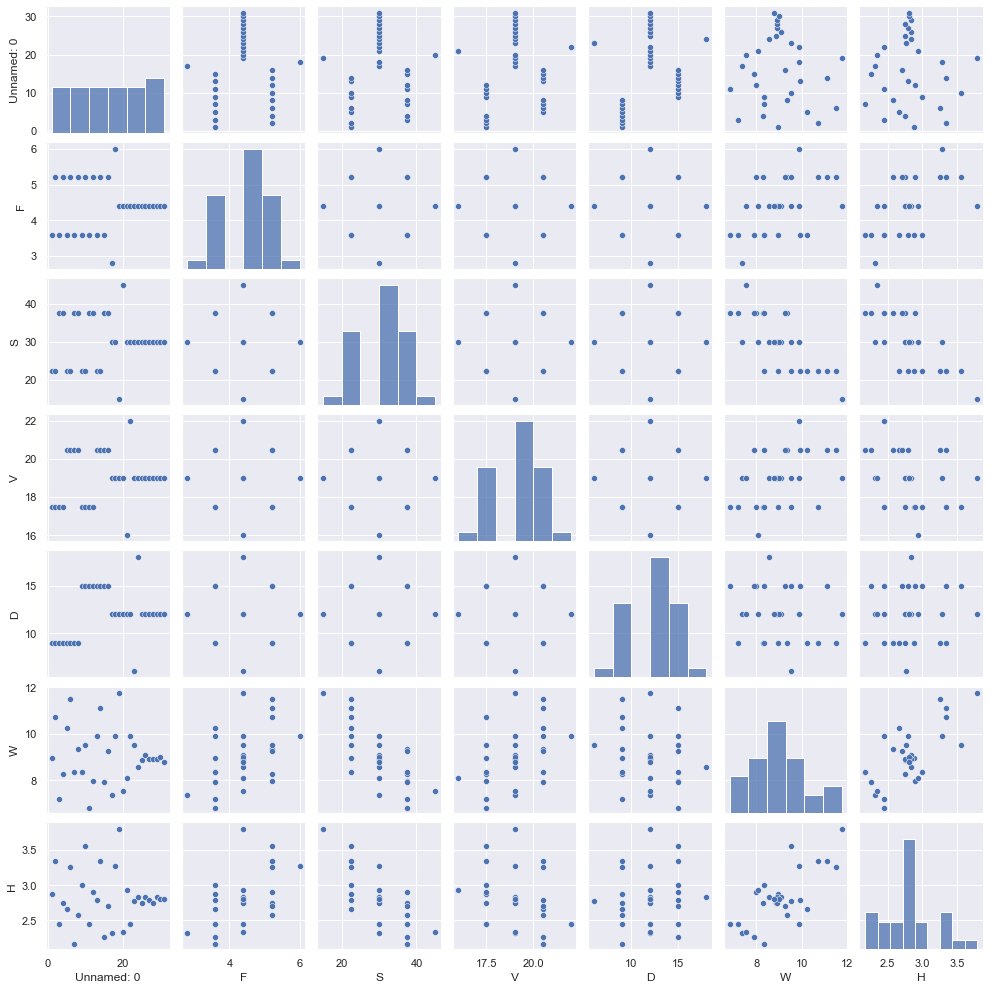

In [6]:
sns.set()
sns.pairplot(data,height = 2, kind='scatter') 
plt.show()

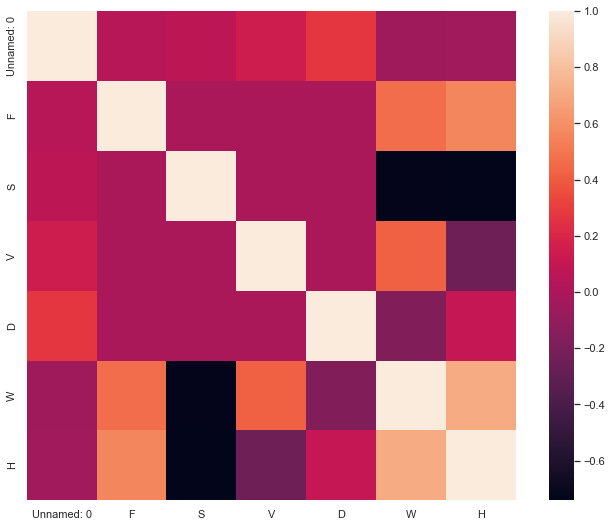

In [7]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
x=np.array(data.S).reshape((-1,1))
y=np.array(data.W)

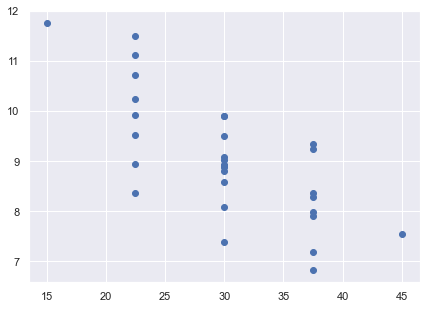

In [10]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.scatter(x, y, label='data')

In [11]:
l_model = LinearRegression()
l_model

LinearRegression()

In [12]:
l_model.fit(x, y)

LinearRegression()

In [13]:
a0 = l_model.intercept_
print('Intercept:', a0) 

Intercept: 12.992849462365587


In [14]:
a1 = l_model.coef_
print('Slope:', a1)

Slope: [-0.131]


In [15]:
R2 = l_model.score(x, y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.5366131448676352


In [16]:
y_pred = l_model.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[10.039 10.039  8.07   8.07  10.039 10.039  8.07   8.07  10.039 10.039
  8.07   8.07  10.039 10.039  8.07   8.07   9.055  9.055 11.024  7.085
  9.055  9.055  9.055  9.055  9.055  9.055  9.055  9.055  9.055  9.055
  9.055]


In [17]:
from sklearn.metrics import r2_score

In [18]:
r2 = r2_score(y, y_pred)
print('Coefficient of determination:', r2)

Coefficient of determination: 0.5366131448676352


In [19]:
ypred = lambda x: a0 + a1*x

Text(0, 0.5, 'y')

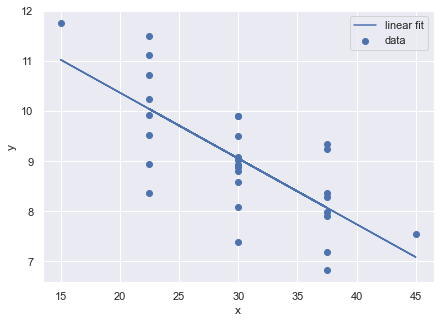

In [20]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.scatter(x, y, label='data')
ax1.plot(x, ypred(x), label='linear fit')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')

In [21]:
x=np.array(data.F).reshape((-1,1))
y=np.array(data.H)

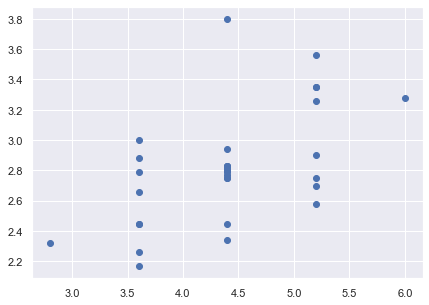

In [22]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.scatter(x, y, label='data')

In [23]:
l_model = LinearRegression()
l_model

LinearRegression()

In [24]:
l_model.fit(x, y)

LinearRegression()

In [25]:
a0 = l_model.intercept_
print('Intercept:', a0)

Intercept: 1.5108131720430105


In [26]:
a1 = l_model.coef_
print('Slope:', a1)

Slope: [0.297]


In [27]:
R2 = l_model.score(x, y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.31767567713676537


In [28]:
y_pred = l_model.predict(x)
print('Predicted response:', y_pred, sep='\n')

Predicted response:
[2.581 3.057 2.581 3.057 2.581 3.057 2.581 3.057 2.581 3.057 2.581 3.057
 2.581 3.057 2.581 3.057 2.344 3.295 2.819 2.819 2.819 2.819 2.819 2.819
 2.819 2.819 2.819 2.819 2.819 2.819 2.819]


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2 = r2_score(y, y_pred)
print('Coefficient of determination:', r2)

Coefficient of determination: 0.31767567713676537


In [31]:
ypred = lambda x: a0 + a1*x

Text(0, 0.5, 'y')

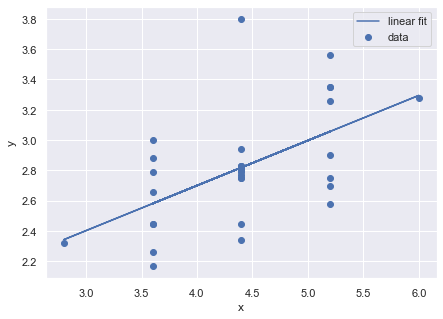

In [32]:
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.scatter(x, y, label='data')
ax1.plot(x, ypred(x), label='linear fit')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
Degree = 2
pol_features = PolynomialFeatures(degree=Degree, include_bias=False)

In [35]:
x_poly = pol_features.fit_transform(x)

In [36]:
x.shape, x_poly.shape

((31, 1), (31, 2))

In [37]:
pol_features.get_feature_names( ['F', 'S', 'D', 'V'] )

['F', 'F^2']

In [38]:
ols = LinearRegression()
model = ols.fit(x_poly, y)

In [39]:
a0 = model.intercept_
print('Intercept:', a0)

Intercept: 1.3560005482456223


In [40]:
a1 = model.coef_
print('Slope:', a1)

Slope: [ 0.37  -0.008]


In [41]:
R2 = model.score(x_poly, y)
print('Coefficient of determination:', R2)

Coefficient of determination: 0.31786545147435796


In [42]:
testing_data=pd.read_excel('bead_geometry_gmaw_test.xlsx')

In [43]:
testing_data.info

<bound method DataFrame.info of     Unnamed: 0    F     S     V     D       W      H
0          1.0  4.0  21.0  17.0  12.0   8.798  3.346
1          2.0  4.0  27.0  17.0  12.0   7.899  2.961
2          3.0  4.0  30.0  17.0  12.0   7.954  2.854
3          4.0  4.0  36.0  17.0  12.0   7.249  2.662
4          5.0  4.0  39.0  17.0  12.0   7.193  2.533
5          6.0  5.2  27.0  18.9  12.0  10.002  3.218
6          7.0  5.2  30.0  18.9  12.0   9.116  3.047
7          8.0  6.0  27.0  20.3  12.0  11.233  3.304
8          9.0  5.2  22.5  19.0  12.0  10.610  3.411
9         10.0  5.2  37.5  19.0  12.0   8.494  2.790
10        11.0  4.4  37.5  17.5  12.0   7.788  2.811
11        12.0  6.0  37.5  20.5  12.0   9.849  2.876>

In [44]:
pd.DataFrame(testing_data)

,Unnamed: 0,F,S,V,D,W,H
0,1.0,4.0,21.0,17.0,12.0,8.798,3.346
1,2.0,4.0,27.0,17.0,12.0,7.899,2.961
2,3.0,4.0,30.0,17.0,12.0,7.954,2.854
3,4.0,4.0,36.0,17.0,12.0,7.249,2.662
4,5.0,4.0,39.0,17.0,12.0,7.193,2.533
5,6.0,5.2,27.0,18.9,12.0,10.002,3.218
6,7.0,5.2,30.0,18.9,12.0,9.116,3.047
7,8.0,6.0,27.0,20.3,12.0,11.233,3.304
8,9.0,5.2,22.5,19.0,12.0,10.610,3.411
9,10.0,5.2,37.5,19.0,12.0,8.494,2.790


In [45]:
W=np.array(testing_data.W).reshape((-1,1))
H=np.array(testing_data.H)

In [46]:
w=l_model.predict(W)

In [47]:
w

array([4.127, 3.86 , 3.876, 3.667, 3.65 , 4.485, 4.222, 4.851, 4.666,
       4.037, 3.827, 4.44 ])

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [49]:
rms=mean_squared_error(w,H, squared = False)
rms

1.1800340632009345

In [50]:
mean_absolute_percentage_error(w,H)

0.278443129674434

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 5)

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
decision_regressor = DecisionTreeRegressor(max_depth=3)

In [55]:
decision_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [56]:
y_pred = decision_regressor.predict(x_test)

In [57]:
mean_absolute_percentage_error(y_test, y_pred)

0.052331527224162844

In [58]:
mean_squared_error(y_test, y_pred)

0.0361790550696468

In [59]:
r2_score(y_test, y_pred)

0.6700588687115776

In [60]:
from sklearn.tree import plot_tree

In [61]:
features=['F','S','D','V','W','H']

[Text(325.5, 302.0, 'F <= 4.0\nmse = 0.146\nsamples = 24\nvalue = 2.812'),
 Text(162.75, 181.2, 'F <= 3.2\nmse = 0.094\nsamples = 7\nvalue = 2.583'),
 Text(81.375, 60.39999999999998, 'mse = 0.0\nsamples = 1\nvalue = 2.32'),
 Text(244.125, 60.39999999999998, 'mse = 0.096\nsamples = 6\nvalue = 2.627'),
 Text(488.25, 181.2, 'F <= 4.8\nmse = 0.137\nsamples = 17\nvalue = 2.906'),
 Text(406.875, 60.39999999999998, 'mse = 0.135\nsamples = 10\nvalue = 2.831'),
 Text(569.625, 60.39999999999998, 'mse = 0.12\nsamples = 7\nvalue = 3.014')]

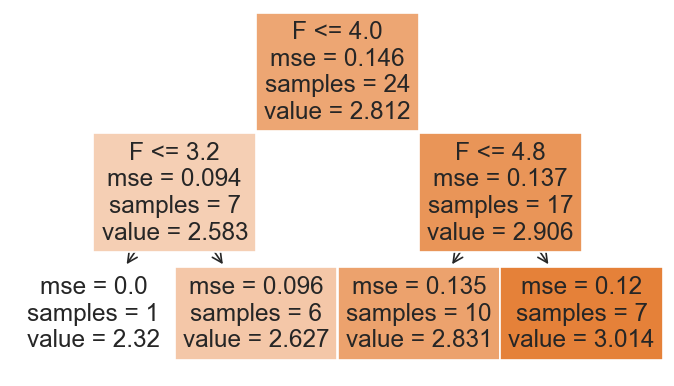

In [62]:
fig_plottree, axes_plottree = plt.subplots(nrows=1, ncols=1, figsize=(7,4), dpi=120)
plot_tree(decision_regressor,  
          feature_names=features, 
          class_names=W, 
          filled=True)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
randomForestModel = RandomForestRegressor(n_estimators=200,
                                          bootstrap = True,
                                          max_features = 'sqrt')

In [65]:
randomForestModel.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [66]:
rf_predictions = randomForestModel.predict(x_test)

In [67]:
print('Mean Absolute Error:', mean_absolute_percentage_error(y_test, rf_predictions))

Mean Absolute Error: 0.051771808577854954


In [68]:
print('Mean Squared Error:', mean_squared_error(y_test, rf_predictions))

Mean Squared Error: 0.034689595702947926


In [69]:
feature_list = data.columns

In [70]:
importances = list(randomForestModel.feature_importances_)

In [71]:
feature_importances = [(feature, round(importance, 2)) for
feature, importance in zip(feature_list, importances)]

In [72]:
feature_importances = sorted(feature_importances, key = lambda
x: x[1], reverse = True)

In [73]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Unnamed: 0           Importance: 1.0


[None]